## Extract Skeleton from Skeletonized images

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import skan
from pathlib import Path
import networkx as nx

In [80]:
from skimage.morphology import skeletonize, skeletonize_3d
import skimage as sk

# path = Path('/home/rishabhstein/Documents/Python_Scripts/Copied_Data/Wierzbica/WB10/TimeView/diff/Dominant_wormhole/Skeleton/')
# file = Path(path.resolve(), 'diff_52_dominant_skeleteon1.tif')


# path = Path('/home/rishabhstein/Desktop/')
# file = Path(path.resolve(), 'test4_loop_skan2D.tif')


path = Path('/home/rishabhstein/Documents/Python_Scripts/Copied_Data/Pinczow/PZ_01_ILL_diff/Skeleton/')
suffix = 'PZ_01_ILL_skeleton_Hres_final'
file = Path(path.resolve(), suffix + '.tif')



skeleton = sk.io.imread(str(file))



In [81]:
from lib import Analyze_Skeleton as AS
import importlib
importlib.reload(AS)


<module 'lib.Analyze_Skeleton' from '/home/rishabhstein/Documents/Python_Scripts/Notebooks/lib/Analyze_Skeleton.py'>

In [82]:
WB07 = AS.Analyze_Skeleton(skeleton, suffix = suffix)

In [83]:
WB07.Skeletonized_image_to_NetworkX_Graph()

### Visualize in Paraview

In [84]:
WB07.Nx_to_vtk(addtional_suffix='old')

In [85]:
isolated_mnode = WB07.Remove_isolated_nodes()
print(isolated_mnode)

[0, 1996, 1997, 2006, 2015, 2017, 2019, 2027, 2036, 2044, 2050, 2054, 2055, 2059, 2064, 2069, 2070, 2077, 2078, 2085, 2086, 2099, 2105, 2106, 2107, 2108, 2134, 2135, 2184, 2194, 2205, 2206, 2207, 2221, 2223, 2226, 2275, 2287, 2290, 2291, 2295, 2303, 2304, 2310, 2331, 2359, 2369, 2370, 2371, 2380, 2381, 2382, 2391, 2393, 2394, 2401, 2407, 2408, 2409, 2419, 2420, 2454, 2463, 2464, 2465, 2466, 2485, 2486, 2493, 2494, 2508, 2513, 2530, 2547, 2636, 2637, 2643, 2646, 2656, 2663, 2664, 2689, 2698, 2713, 2721, 2722, 2729, 2735, 2736, 2738, 2745, 2758, 2759, 2760, 2771, 2777, 2778, 2792, 2824, 2831, 2851, 2856, 2857, 2858, 2866, 2880, 2897, 2900, 2904, 2948, 3003, 3004, 3005, 3007, 3009, 3011, 3012, 3025, 3026, 3027, 3037, 3056, 3064, 3065, 3081, 3085, 3086, 3088, 3097, 3100, 3101, 3105, 3122, 3154, 3166, 3167, 3176, 3178, 3188, 3189, 3193, 3194, 3195, 3202, 3203, 3204, 3205, 3208, 3209, 3211, 3212, 3213, 3218, 3219, 3220, 3226, 3239, 3243, 3260, 3263, 3264, 3270, 3284, 3285, 3287, 3291, 3303, 

### Delete loops if necessary

In [89]:
WB07.Delete_Loops_from_Skeleton()

Finding dominant wormhole
%=====================Looking for Inlet node=========================%

Node-0is not connected to main wormhole
Node-1 is connected and chosen as source node
%=====================Looking for Outlet node=========================%


 Node-3534 is connected and chosen as outlet node
No cycle found.


### Finding the dominant wormhole

In [217]:
WB07.Nx_to_vtk(addtional_suffix='new')

In [90]:
lenth = WB07.length_of_wormhole
tot = WB07.Tortuosity()
waste = WB07.Wastefulness()
print("Length of wormhole is: ", lenth)
print("Tortuosity of wormhole is: ", tot)
print("Wastefulness of wormhole is: ", waste)

Length of wormhole is:  725.2982303880395
Tortuosity of wormhole is:  1.6298836637933474
Wastefulness of wormhole is:  10.877546489462715


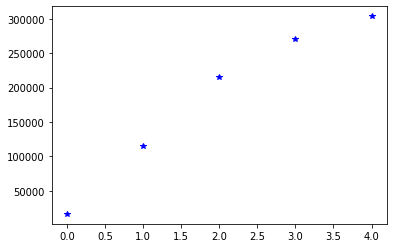

In [42]:
import matplotlib.pyplot as plt
ar = [16415, 114795, 215039, 270560, 303648]

sf = [10382, 57998, 88953, 90855, 93563]


Wst = [3.262, 3.471, 2.758, 3.029, 3.125]

plt.plot(ar, 'b*')
#plt.plot(sf, 'ro')
#plt.plot(Wst,'g^')

### Main function which find the loops and source and sync nodes

In [82]:
#Finding the dominant wormhole
def Find_Dominant_Wormhole(G, cord):
    #This function works best for 3D images, because of uncertainity in choosing
    # Inlet and Outlet node in 2D
    #No. of slices should be in Z-Axis (i.e First axis here)
    
    
    outlet_node_found = False
    inlet_in_isolated_node = False
    
    
    non = len(cord) #non of total nodes
    
    print("%=====================Looking for Inlet node=========================%")
    inletz, _, _ = np.argmin(cord, axis=0)
    
    if inletz in isolated_mnode: 
        print("Node-" + str(inletz) + "is not connected to main wormhole")
        inlet_in_isolated_node = True
        tmp_io = 0;
        
    while (inlet_in_isolated_node):
        
        tmp_io += 1 ;
        inletz = tmp_io + np.argmin(cord[tmp_io:non, 0]) #tmp_ioo is added because location of minimum z is always zero if element is excluded

        if inletz in isolated_mnode: 
            print("Node-" + str(inletz) + "is not connected to main wormhole")
            inlet_in_isolated_node = True
        else:
            print("Node-"+ str(inletz) + " is connected and chosen as source node")
            inlet_in_isolated_node = False
            break;
  
    print("%=====================Looking for Outlet node=========================%")     
    i = 0;
    while (outlet_node_found == False and i < 20):
            
        try:
            outletz = np.argmax(cord[0:non, 0])
            nx.shortest_path(G, inletz,  outletz)
            outlet_node_found = True
            
        except Exception:
            print("Node-" + str(non) + " is not connected to Node-" + str(inletz))
            non -= 1;  i += 1;
            
            
    dominant_wormhole = nx.shortest_path(G, inletz,  outletz)
    length_of_wormhole = nx.shortest_path_length(G, inletz,  outletz, weight='weight')
    return length_of_wormhole, dominant_wormhole



In [83]:
lenth, path_of_wormhole = Find_Dominant_Wormhole(WB07.G, WB07.node_cordinates)
print(path_of_wormhole)

%=====================Looking for Inlet node=========================%
Node-0is not connected to main wormhole
Node-1 is connected and chosen as source node
%=====================Looking for Outlet node=========================%
[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 18, 20, 21, 23, 25, 33, 36, 43, 45, 26, 49, 50, 51, 52, 53, 29, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 120, 119, 118, 132, 131, 117, 130, 129, 128, 127, 126, 125, 124, 123, 122, 121, 134, 133, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 48, 166, 167, 168, 169, 170, 171, 172, 173, 54, 175, 181, 183, 185, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 212, 55, 214, 215, 216, 225, 231, 236, 240, 243, 56, 250, 2

In [100]:
cycles = nx.find_cycle(WB07.G)

if_main_wormhole_path = False

junction_nodes = [];
loop_source_sync = [] #make a copy
for c in cycles:
    u = c[0]; v = c[1];
    if len(list(WB07.G.neighbors(u))) > 2 :
        junction_nodes.append(u)
    elif u in path_of_wormhole:
        if_main_wormhole_path = True

        
def Longest_branch_in_loop(G, junction_nodes):
    tmp_ln = 0;
    source = 0;
    sync = 0;
    for i,j in itertools.combinations(junction_nodes, 2):
        shortest_path_ln = nx.shortest_path_length(G,  i, j)
            #Specific case to break the shortest branch
        if tmp_ln < shortest_path_ln:
            tmp_ln = shortest_path_ln
            source = i; sync = j;
    return [source,sync]
        
        
        
import itertools
shortes_path = []

if(if_main_wormhole_path == False):
    if (len(junction_nodes) > 2):
        for i,j in itertools.combinations(junction_nodes, 2):
            shortes_path = nx.shortest_path(WB07.G,  i, j)
            print(shortes_path)
            if len([w for w in junction_nodes if w in shortes_path]) > 2:
                loop_source_sync.extend([i,j])
                break;
            else:
                loop_source_sync.extend(Longest_branch_in_loop(WB07.G,junction_nodes)) #Specific case to break the shortest branch
                break;
    else:
        loop_source_sync = junction_nodes
        
elif (if_main_wormhole_path == True):
        print("This cycle is in main wormhole path")
        if (len(junction_nodes) > 2):
            for i,j in itertools.combinations(junction_nodes, 2):
                if i in path_of_wormhole and j in path_of_wormhole:
                    shortes_path = nx.shortest_path(WB07.G,  i, j)
                    print(shortes_path)
                    if len([w for w in junction_nodes if w in shortes_path]) > 2:
                        loop_source_sync.extend([i,j])
                        break;
                    else:
                        loop_source_sync = [jn for jn in junction_nodes if jn in path_of_wormhole]
                 
        else:
            loop_source_sync = junction_nodes



[1303, 2206, 2211, 2214, 2217, 2225, 1408]


In [101]:
print(junction_nodes)
print(loop_source_sync)

[1303, 1408, 1454, 1411, 1407]
[1303, 1411]


In [93]:
loop_paths = list(nx.all_simple_paths(WB07.G, loop_source_sync[0], loop_source_sync[1]))
print(loop_paths)

[[1303, 2206, 2211, 2214, 2217, 2225, 1408, 2247, 2270, 1454, 2269, 1411], [1303, 2208, 2207, 2205, 2210, 2213, 1407, 2239, 2244, 2245, 2246, 1411]]


In [94]:
path_length = list(len(i) for i in loop_paths)
path_length = np.sort(path_length)
path_length

array([12, 12])

### Deleting the edges

In [98]:
tmp_e2 = [];
for i in loop_paths:
    if len(i) > path_length[0]:
        e1 = loop_source_sync[1]
        e2 = i[-2]
        if e2 not in tmp_e2 and e2 not in nx.shortest_path(WB07.G, loop_source_sync[0], loop_source_sync[1]):
            WB07.G.remove_edge(e1,e2)
   #         print(loop_paths)
            tmp_e2.append(e2)
        

In [99]:
tmp_e2

[]

In [90]:
cycles = nx.find_cycle(WB07.G)
print(cycles)

[(1303, 2206), (2206, 2211), (2211, 2214), (2214, 2217), (2217, 2225), (2225, 1408), (1408, 2247), (2247, 2270), (2270, 1454), (1454, 2269), (2269, 1411), (1411, 2246), (2246, 2245), (2245, 2244), (2244, 2239), (2239, 1407), (1407, 2213), (2213, 2210), (2210, 2205), (2205, 2207), (2207, 2208), (2208, 1303)]


In [ ]:
def StrahlerOrder(G, root):
    # initialize all nodes to 1
    for p in G:
        G.nodes[p]['Strahler'] = 1
        G.nodes[p]['level'] = 0      # longest path from this node to a leaf - leaves have level 1.
    
    nodes = nx.dfs_postorder_nodes(G, root)
    for p in nodes:
        neigh = nx.all_neighbors(G, p)
        delta = 0
        mx = 0
        level = 0
        for q in neigh:
            if G.nodes[q]['Strahler'] == mx: # we met the max value again
                delta = 1 
            if G.nodes[q]['Strahler'] > mx:
                mx = G.nodes[q]['Strahler']
                delta = 0
            level = max(level, G.nodes[q]['level'])
        G.nodes[p]['Strahler'] = mx + delta
        G.nodes[p]['level'] = level + 1 
        
    # assign Strahler orders to edges too
    for e in G.edges():
        s = min(G.nodes[e[0]]['Strahler'], G.nodes[e[1]]['Strahler'])
        G[e[0]] [e[1]] ['Strahler'] = s
        s = min(G.nodes[e[0]]['level'], G.nodes[e[1]]['level'])
        G[e[0]] [e[1]] ['level'] = s

    # determine the parent of each node, based on the node 'level'
    for n in G:
        m = 0
        p = None
        for n2 in G[n]:
            if G.nodes[n2]['level'] > m and G.nodes[n2]['level'] > G.nodes[n]['level']:
                m = G.nodes[n2]['level']
                p = n2
        G.nodes[n]['parent'] = p
    return

### Analyze skeleton testing methods

### Convert to sparse matrix for networkx

In [36]:
from skan import skeleton_to_csgraph
import networkx as nx
from skan import draw

pg, cord, deg = skeleton_to_csgraph(skeleton)

In [37]:
G = nx.from_scipy_sparse_matrix(pg)

### Adding positions in graph G

In [38]:
pos = {}
pos = {i: (cord[i,0], cord[i,1],cord[i,2]) for i in range(len(cord))}

for n, p in pos.items():
    G.nodes[n]['pos'] = p
    

<module 'networkxtoVTK' from '/home/rishabhstein/Documents/Python_Scripts/Notebooks/networkxtoVTK.py'>

In [ ]:
StrahlerOrder(G, 1)
listok =[]
for n, p in pos.items():
    listok.append(G.nodes[n]['level'])
    print(n, G.nodes[n])

In [ ]:
inletx,_, _ = np.argmin(cord, axis=0)
outlet = len(cord)
print(inletx)
print(cord[inletx])

In [ ]:
path_to_node = nx.shortest_path(G, 1,  190)

In [ ]:
lenth = nx.shortest_path_length(G,1,190,weight='weight')/cord[190][0]

In [ ]:
nx.draw_networkx_edges(G, pos)

In [ ]:
plt.figure(figsize=(5,10))
plt.plot(cord[:,2], cord[:,0],'b.' )

### For plotting network imported in networkx

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
def network_plot_3D(G, angle, save=False):

    # Get node positions
    pos = nx.get_node_attributes(G, 'pos')
    
    # Get number of nodes
    n = G.number_of_nodes()

    # Get the maximum number of edges adjacent to a single node
    edge_max = max([G.degree(i) for i in range(n)])

    # Define color range proportional to number of edges adjacent to a single node
    colors = [plt.cm.plasma(G.degree(i)/edge_max) for i in range(n)] 

    # 3D network plot
    with plt.style.context(('ggplot')):
        
        fig = plt.figure(figsize=(7,10))
        ax = Axes3D(fig)
        
        # Loop on the pos dictionary to extract the x,y,z coordinates of each node
        for key, value in pos.items():
            xi = value[0]
            yi = value[1]
            zi = value[2]
            
            # Scatter plot
#            ax.scatter(xi, yi, zi)#, c=colors[key], s=20+20*G.degree(key), edgecolors='k', alpha=0.7)
        
        # Loop on the list of edges to get the x,y,z, coordinates of the connected nodes
        # Those two points are the extrema of the line to be plotted
        for i,j in enumerate(G.edges()):

            x = np.array((pos[j[0]][0], pos[j[1]][0]))
            y = np.array((pos[j[0]][1], pos[j[1]][1]))
            z = np.array((pos[j[0]][2], pos[j[1]][2]))
        
        # Plot the connecting lines
            ax.plot(x, y, z, c='black', alpha=0.5)
    
    # Set the initial view
    ax.view_init(angle,180)

    # Hide the axes
    #ax.set_axis_off()

    
    if save is not False:
        plt.savefig("../Skeletons/"+str(angle).zfill(3)+".png")
        plt.close('all')
    else:
        plt.show()

    return

In [ ]:
# for k in range(20,21,4):
k=70
angle = (k-20)*360/(200-20)

network_plot_3D(G, angle, save=False)
print(angle)

### Let's study skeleton

In [ ]:
from skan import Skeleton, summarize
data = summarize(Skeleton(skeleton))
data.tail()


In [ ]:
branch_dist = data['branch-distance']
np.sum(branch_dist)

In [ ]:
file = '/home/rishabhstein/Documents/Python_Scripts/Copied_Data/Wierzbica/WB10/crop_268_368.tif'
import cv2 as cv

plt.figure(figsize=[10,10])
img = cv.imread(file,0)
n,b,c = plt.hist(img.ravel(), bins =200)
plt.xlim(2,255)
plt.ylim(0,80000)
plt.xlabel('Pixel intensity')
plt.ylabel('No. of pixels')
plt.savefig('../histogram_slicee.png')

In [ ]:
plt.figure(figsize=[10,10])
plt.plot(n)
plt.xlim(2,255)
plt.ylim(0,110000)
plt.xlabel('Pixel intensity')
plt.ylabel('No. of pixels')
#plt.savefig('../histogram_slicee.png')

In [ ]:
from skimage.morphology import skeletonize_3d medial_axis
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert
import skimage as sk

# Invert the horse image
image = sk.io.imread('/home/rishabhstein/Desktop/Cone1.tif', as_gray = False)

# perform skeletonization
skeleton = medial_axis(image)

sk.io.imsave('../Skeleton_scikit.tif',skeleton)
# # display results
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
#                          sharex=True, sharey=True)

# ax = axes.ravel()

# ax[0].imshow(image, cmap=plt.cm.gray)
# ax[0].axis('off')
# ax[0].set_title('original', fontsize=20)

# ax[1].imshow(skeleton, cmap=plt.cm.gray)
# ax[1].axis('off')
# ax[1].set_title('skeleton', fontsize=20)

# fig.tight_layout()
# plt.show()


In [ ]:
import numpy as np
np.shape(image)

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# load some test data for demonstration and plot a wireframe
X, Y, Z = axes3d.get_test_data(0.1)
ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)

# rotate the axes and update
# for angle in range(0, 360):
angle = 18
ax.view_init(angle, 50)
plt.draw()
#     plt.savefig("../Skeletons/"+str(angle).zfill(3)+".png")
  #  plt.close('all')